In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset'
canc = []
l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
for i in range(40):
    img_arr = cv2.imread((os.path.join(path,l[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    canc.append([new_arr,1])
canc[35]

[array([[[182, 154, 158],
         [185, 162, 158],
         [186, 171, 166],
         ...,
         [157, 147, 153],
         [158, 141, 153],
         [151, 135, 145]],
 
        [[184, 154, 147],
         [180, 159, 163],
         [187, 171, 169],
         ...,
         [158, 148, 159],
         [157, 143, 146],
         [150, 134, 150]],
 
        [[182, 150, 150],
         [182, 162, 161],
         [185, 172, 174],
         ...,
         [159, 143, 155],
         [158, 141, 150],
         [151, 131, 140]],
 
        ...,
 
        [[150, 129, 164],
         [150, 126, 147],
         [147, 114, 138],
         ...,
         [179, 156, 171],
         [180, 160, 171],
         [182, 154, 176]],
 
        [[154, 124, 146],
         [145, 116, 140],
         [145, 109, 135],
         ...,
         [181, 158, 176],
         [181, 155, 179],
         [184, 158, 176]],
 
        [[148, 115, 136],
         [144, 112, 135],
         [146, 112, 145],
         ...,
         [180, 157, 177],
  

In [ ]:
nc_path = '/content/drive/My Drive/new1'
non_canc = []
la = os.listdir('/content/drive/My Drive/new1')
for i in range(40):
    img_arr = cv2.imread((os.path.join(nc_path,la[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    non_canc.append([new_arr,0])
non_canc[15]

[array([[[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        ...,
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
  

In [ ]:
len(canc)

40

In [ ]:
l = canc + non_canc
random.shuffle(l)

In [ ]:
len(l)

80

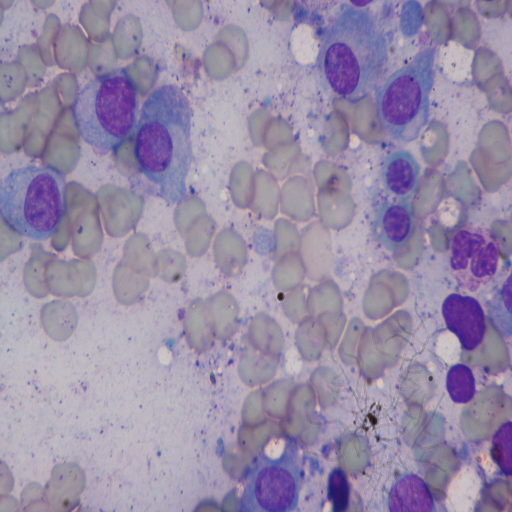

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(l[19][0])

In [ ]:
x = []
y = []
for img,label in l:
    x.append(img)
    y.append(label)

In [ ]:
#x = x/255.0
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(80, 512, 512, 3)

In [ ]:
y_c = np.copy(y)

In [ ]:
import tensorflow
y_c = tensorflow.keras.utils.to_categorical(y_c,num_classes=2)

In [ ]:
y_c[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
for i in x:
  i[:,:,0] = clahe.apply(i[:,:,0])
  i[:,:,1] = clahe.apply(i[:,:,1])
  i[:,:,2] = clahe.apply(i[:,:,2])

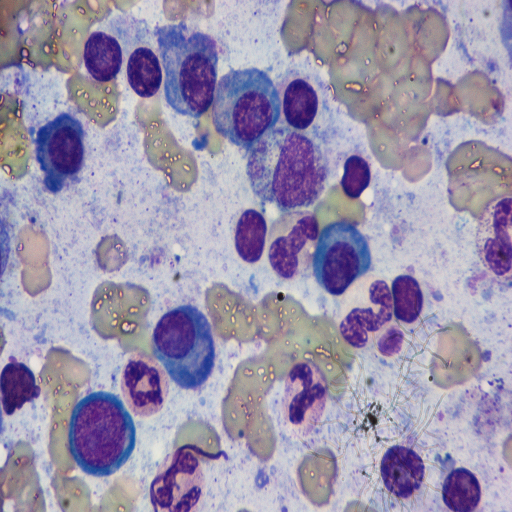

In [ ]:
cv2_imshow(x[1])

In [ ]:
y[1]

1

In [ ]:
def mask(img):
  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  pink_lower = np.array([100, 100, 30])
  pink_upper = np.array([255, 250, 250])
  mask = cv2.inRange(hsv_img, pink_lower, pink_upper)
  return(mask)

In [ ]:
def seg(img):
  yield (cv2.bitwise_and(img, img, mask = mask(img)))

In [ ]:
seg_list = []
for i in x:
  q = list(seg(i))
  seg_list.append(q[0])

In [ ]:
seg_list = np.array(seg_list)
#seg_list = np.reshape((56,512,512,3))
seg_list.shape

(80, 512, 512, 3)

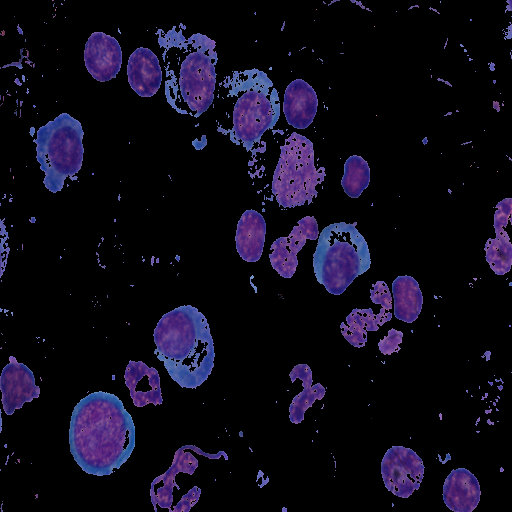

In [ ]:
cv2_imshow(seg_list[1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(seg_list,y_c,test_size = 0.30,random_state = 1)

In [ ]:
x_train.shape

(56, 512, 512, 3)

In [ ]:
x_test.shape

(24, 512, 512, 3)

In [ ]:
import tensorflow as tf
import os
from tensorflow import keras
from keras import Sequential
from keras.layers import (Conv2D,Flatten,Dense,Dropout,
BatchNormalization,ZeroPadding2D,MaxPooling2D,GlobalAveragePooling2D,Activation,LeakyReLU)
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [ ]:
model = Sequential()  
model.add(Conv2D(96, (11, 11), input_shape = (512,512,3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (5, 5), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),strides=2)) 
model.add(ZeroPadding2D((1,1))) 
model.add(Conv2D(384, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(ZeroPadding2D((1,1))) 
model.add(Conv2D(192, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(ZeroPadding2D((1,1))) 
model.add(Conv2D(128, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(GlobalAveragePooling2D()) 
model.add(Dense(4096, kernel_initializer='glorot_normal')) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(4096, kernel_initializer='glorot_normal')) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(2, kernel_initializer='glorot_normal')) 
model.add(Activation('softmax')) 

In [ ]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=8,epochs = 4,validation_split=0.10)

Epoch 1/4
7/7 [==============================] - 5s 711ms/step - loss: 177.1143 - accuracy: 0.5400 - val_loss: 0.6581 - val_accuracy: 0.8333
Epoch 2/4
7/7 [==============================] - 3s 396ms/step - loss: 0.7693 - accuracy: 0.4600 - val_loss: 0.8337 - val_accuracy: 0.1667
Epoch 3/4
7/7 [==============================] - 3s 397ms/step - loss: 0.7768 - accuracy: 0.3400 - val_loss: 0.8049 - val_accuracy: 0.1667
Epoch 4/4
7/7 [==============================] - 3s 400ms/step - loss: 0.7080 - accuracy: 0.4800 - val_loss: 0.7271 - val_accuracy: 0.1667


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 512, 512, 96)      34944     
_________________________________________________________________
activation_2 (Activation)    (None, 512, 512, 96)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 256, 256, 96)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     307328    
_________________________________________________________________
activation_3 (Activation)    (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 128)     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 130, 130, 128)    

In [ ]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer('dense').output)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

def best_SVC(X,y):
    svc_model = SVC(probability=True,coef0=0.3)
    param_dic = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                 'kernel':['rbf','poly','sigmoid'], 
                 'degree':[2,3,4]
                 }
    clf = RandomizedSearchCV(estimator = svc_model,param_distributions=param_dic,n_iter = 100, cv = 3, verbose=2, 
                             random_state=42, n_jobs = -1)
    clf.fit(X, y)
    print("Best parameters: ", clf.best_params_)
    return clf.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
svm_x_train = intermediate_layer_model.predict(x_train)
svm_x_test = intermediate_layer_model.predict(x_test)

In [ ]:
svm_x_train.shape

(56, 4096)

In [ ]:
svm_x_test.shape

(24, 4096)

In [ ]:
y_train1 = []
for i in y_train:
  y_train1.append(np.argmax(i))

In [ ]:
y_test1 = []
for i in y_test:
  y_test1.append(np.argmax(i))

In [ ]:
y_train1 = np.array(y_train1)

In [ ]:
y_train1.shape

(56,)

In [ ]:
y_test1 = np.array(y_test1)

In [ ]:
y_test1.shape

(24,)

In [ ]:
best_model = best_SVC(svm_x_train,y_train1)
predictions = best_model.predict(svm_x_test)
print(accuracy_score(y_test1, predictions))
print(confusion_matrix(y_test1, predictions))
print(classification_report(y_test1, predictions))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.7s


Best parameters:  {'kernel': 'poly', 'gamma': 100, 'degree': 3, 'C': 1}
1.0
[[16  0]
 [ 0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.1s finished


In [ ]:
model.save_weights('weights.hdf5')

In [ ]:
path = '/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset'
test_canc = []
l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
for i in range(41,81):
    img_arr = cv2.imread((os.path.join(path,l[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    test_canc.append([new_arr,1])
#test_canc[]

In [ ]:
nc_path = '/content/drive/My Drive/new1'
test_non_canc = []
for i in range(41,81):
    img_arr = cv2.imread((os.path.join(nc_path,la[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    test_non_canc.append([new_arr,0])
#test_non_canc

In [ ]:
l1 = test_canc + test_non_canc
random.shuffle(l1)

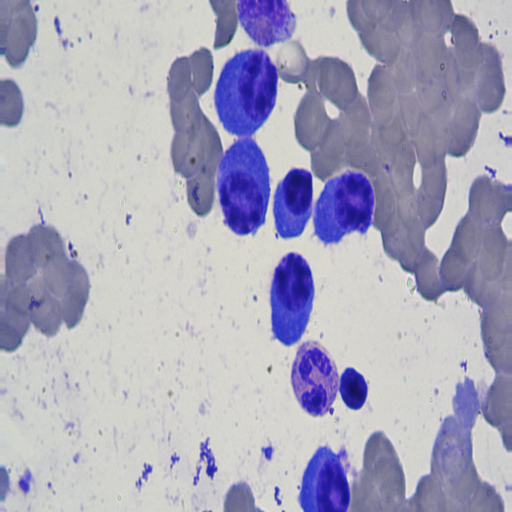

In [ ]:
cv2_imshow(l1[0][0])

In [ ]:
x = []
y = []
for img,label in l1:
    x.append(img)
    y.append(label)

In [ ]:
x = np.array(x)

In [ ]:
x.shape

(80, 512, 512, 3)

In [ ]:
x1 = []
for i in x:
  #i = i.astype("int16")
  q = list(seg(i))
  x1.append(q[0])

y = np.array(y)
y_temp = np.copy(y)

In [ ]:
y = tensorflow.keras.utils.to_categorical(y,num_classes=2)

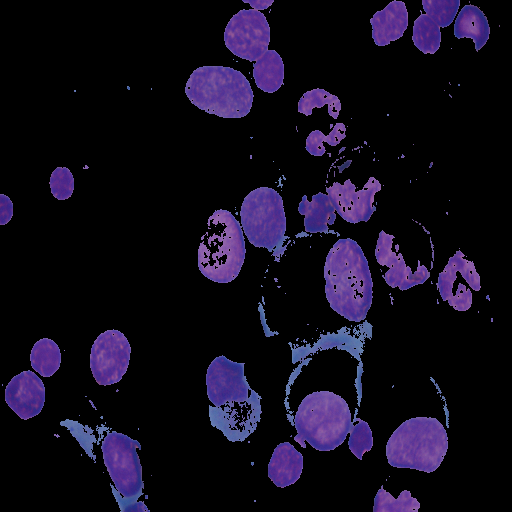

In [ ]:
cv2_imshow(x1[1])

In [ ]:
y[3]

array([1., 0.], dtype=float32)

In [ ]:
len(x1)

80

In [ ]:
x1 = np.array(x1)
x1.shape

(80, 512, 512, 3)

In [ ]:
y_temp[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
'''intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer('batch_normalization_3').output)'''

"intermediate_layer_model = keras.Model(inputs=model.input,\n                                 outputs=model.get_layer('batch_normalization_3').output)"

In [ ]:
unseen_features = intermediate_layer_model.predict(x1)

In [ ]:
pred = best_model.predict(unseen_features)
print(accuracy_score(y_temp, pred))
print(confusion_matrix(y_temp, pred))
print(classification_report(y_temp, pred))

1.0
[[40  0]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
proba = []
z = model.predict_proba([x_test])
for i in z:
  proba.append(np.max(i))

In [ ]:
from sklearn.metrics import roc_curve


In [ ]:
y_temp0 = np.array([np.argmax(i) for i in y_test])
y_temp0

In [ ]:
fpr, tpr, thresholds = roc_curve(y_temp0, proba)

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('false-positive')
plt.ylabel('true-positive')

In [ ]:
import seaborn as sns

In [ ]:
zeroes = []
ones = []
for i in zip(y_temp0, proba):
  if(i[0] == 0):
    zeroes.append(i[1])
  else:
    ones.append(i[1])
  

In [ ]:
def standard(x):
  mean = np.mean(x)
  std = np.std(x)
  for i in x:
    yield((i-mean)/std)

In [ ]:
z = [] 
q = standard(zeroes)
for i in q:
  z.append(i)

In [ ]:
o = []
q = standard(ones)
for i in q:
  o.append(i)

In [ ]:
sns.displot(z,kind='kde')
plt.xlabel('zero-probabilities')
sns.displot(o,kind='kde')
plt.xlabel('one-probabilities')

In [ ]:
sns.jointplot(data =[z,o],kind='kde') 